In [1]:
import numpy as np

import  matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd

import scipy

import xarray as xa

In [2]:
def cldtype_plots(dataset, var, contour=False, times_area=True, *args):
    """Plots datasets by cloud type i.e. CTP vs COD.
    dataset: xarray.Dataset    
        The dataset. MUst include cld_area together with the variable to plot.
    var: str
        The variable to plot. Just for the plot title.
    contour: bool
        Whether you want a contour plot. Optional contour args available.
        Default = False
    times_area: bool
        If true, times the dataset by cld_area dataset in the same domain.
        Default = True
    
    Returns
    -------
    Just the plot
    """
    # Turns around the plot, otherwise the pressure is in the x-axis
    if times_area: 
        mean_ds = dataset[f'{var}_cldtyp_mon'] * dataset.cldarea_cldtyp_mon *0.01
    else:
        mean_ds = dataset
        
    mean_ds = mean_ds.mean(['lat', 'lon', 'time']).transpose() 
    
    if contour:
        mean_ds.plot.contourf(extend="max", *args) 
    else:
        mean_ds.plot(cmap= 'plasma', vmin=0, vmax=7)
    
    # The tick labels for the axis are in the dataset comments 
    plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in mean_ds.press.comment.split('-')])
    plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in mean_ds.opt.comment.split('-')])
    tmin = pd.to_datetime(str(dataset.time.min().values)).strftime('%m-%Y')
    tmax = pd.to_datetime(str(dataset.time.max().values)).strftime('%m-%Y')
    plt.title(f'{tmin} to {tmax}, lat=[{dataset.lat.min().data.item()}, {dataset.lat.max().data.item()}],\
 lon=[{dataset.lon.min().data.item()} {dataset.lon.max().data.item()}]')
    plt.suptitle(f'Cloud {var}')

In [3]:
all0205 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [8]:
all0205.cld

<xarray.DataArray 'cldpress_cldtyp_mon' (opt: 6, press: 7, time: 35, lat: 60,
                                         lon: 360)>
[31752000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2005-05-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
Attributes:
    long_name:      Cloud Parameters: Cloud Effective Pressure, by Cloud Type...
    standard_name:  Cloud Effective Pressure - 
    units:          hPa
    valid_min:             0
    valid_max:          1100

In [4]:
var = "toa_albedo"
albedo_all= xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [5]:
var = "iwp"
iwp_all= xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [6]:
var = "cldtau"
tau_all = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [7]:
st = xa.open_dataset("HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.nc")

In [8]:
itcz = slice(5,15)
trop = slice(-30,30)
bret = slice(-15,15)
ocean_only = slice(120,260)
wp = slice(120,160)
cp = slice(160,200)
ep = slice(210,260)

In [9]:
gist = xa.open_dataset("gistemp1200_GHCNv4_ERSSTv5.nc").sel(lat=trop, time=slice('2002-07-15T00:00:00.000000000','2023-02-15T00:00:00.000000000' )) #
gist

<xarray.Dataset>
Dimensions:      (lat: 30, lon: 180, time: 248, nv: 2)
Coordinates:
  * lat          (lat) float32 -29.0 -27.0 -25.0 -23.0 ... 23.0 25.0 27.0 29.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2023-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-07-08 14:05:16 by SBBX_to_nc 2.0 - ILAND=1200,...

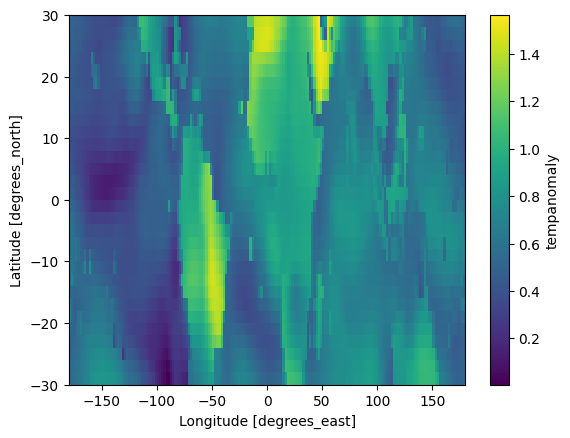

In [10]:
gist.tempanomaly.mean('time').plot()

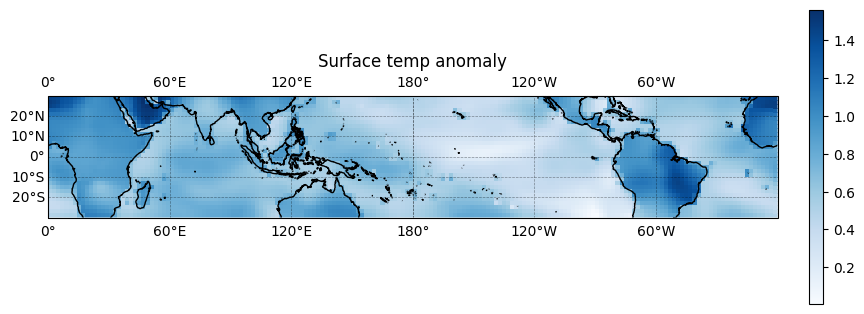

In [11]:
usemap_proj = ccrs.PlateCarree(central_longitude=180)

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=usemap_proj)

plot = gist.tempanomaly.mean('time').plot(extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, cmap='Blues')#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
#ax1.add_patch(patches.Rectangle(xy=[120, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
#ax1.add_patch(patches.Rectangle(xy=[160, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
#ax1.add_patch(patches.Rectangle(xy=[210, 5], width=50, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
plt.colorbar(plot,fraction=0.019, pad=0.04)
plt.title('Surface temp anomaly')
#plt.savefig("area_map.svg", bbox_inches="tight")
plt.show()

In [12]:
st = st.sel(time=slice('2002-07-16T00:00:00.000000000','2020-12-16T00:00:00.000000000'))

Text(0.5, 1.0, 'Tropical cloud fraction climatology')

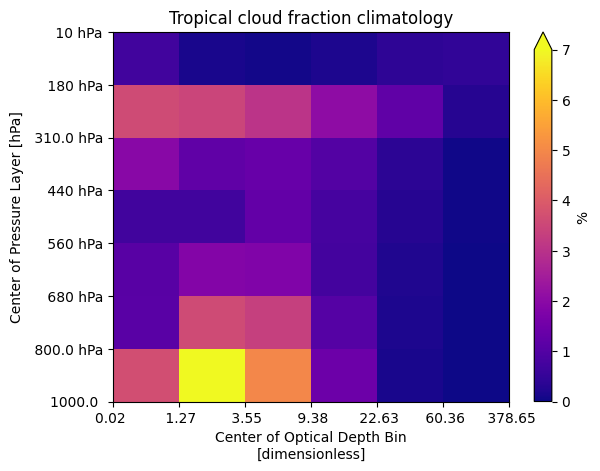

In [65]:
area_trop = tau_all.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime)
ctarea = area_trop.mean(['lat', 'lon', 'time']).transpose().plot(cmap= 'plasma', vmin=0, vmax=7,cbar_kwargs={'label': "%", 'extend': 'neither'})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_trop.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_trop.opt.comment.split('-')])
plt.title('Tropical cloud fraction climatology')
#plt.colorbar set_label('%')

#cldtype_plots(area_trop, var='cldarea', times_area=False)

In [ ]:
area_trop_latlon = area_trop.sel(time=ragutime).mean(['time',])

## Reproducing Raghuramans plot

Time: from 07/2002 to 12/2020

In [50]:
ragutime = slice('2002-07-15T00:00:00.000000000','2020-12-15T00:00:00.000000000' )

In [51]:
#Area anomaly
area_monthclim_trop = area_trop.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month').mean('time')#
area_anom = area_trop.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month') - area_monthclim_trop #esto tieme time = 248 ? no deberian ser 12?

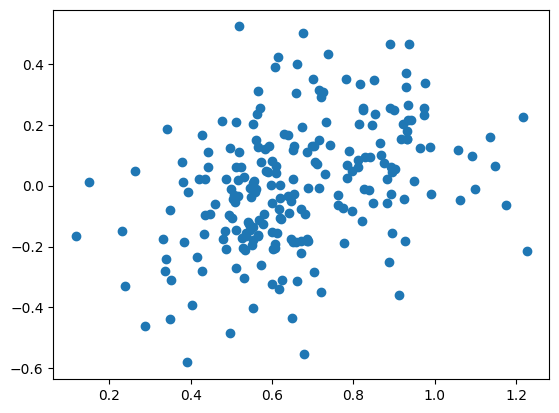

In [52]:
stanom = gist.sel(time=ragutime).tempanomaly.mean(['lat','lon']) #tropical-mean surf temp anomaly
bin = area_anom.sel(press=5, opt=0) #tropical-mean cc anomaly for one grid cell
plt.scatter(stanom, bin)

In [53]:
from scipy import stats
res = stats.linregress(stanom, bin)
res
#sin anomaly slope =0.32 con anonmaly slope =0.37

LinregressResult(slope=0.3760733102145477, intercept=-0.24977584979012216, rvalue=0.36825777043083735, pvalue=1.549736533576011e-08, stderr=0.06401226123600781, intercept_stderr=0.04443362953134744)

In [54]:
m = np.zeros([7,6])
print(m)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [55]:
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = area_anom.sel(press=p, opt=od)
        a = stats.linregress(stanom, bin,).slope
        m[p, od] = a

In [56]:
sens = xa.DataArray(m, 
                    coords={"press": area_trop.press, "opt":area_trop.opt, 
                           },
                   )

Text(0.5, 1.0, 'Tropical cloud cover sensitivity')

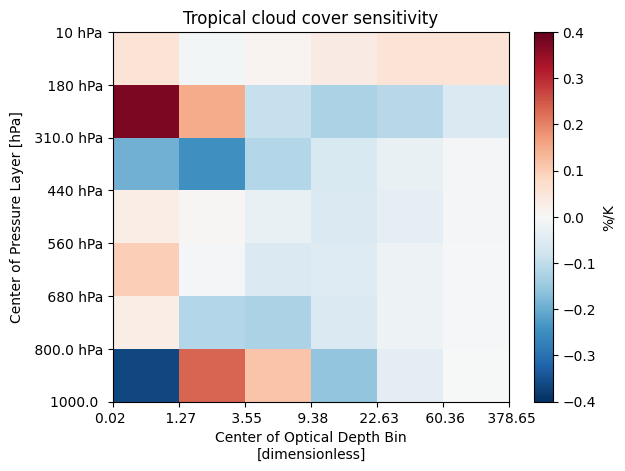

In [64]:
sens.plot(vmin=-0.4, vmax=0.4, cmap='RdBu_r', cbar_kwargs={'label': "%/K"})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_trop.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_trop.opt.comment.split('-')])
plt.title('Tropical cloud cover sensitivity')

## Hadcrut

In [ ]:
sens.plot(vmin=-0.4,)

In [ ]:
st.tas_mean.plot()

In [ ]:
st.tas_mean

In [ ]:
area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, press=[4,5,6], time=timeMcKim).sum(["press", "opt"]).mean(['lat', 'lon'])
thick_area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, lon=ocean_only, press=[4,5,6], opt=[4,5]).mean(['lat', 'lon']).sum(["press", "opt"])
thin_area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, lon=ocean_only, press=[4,5,6], opt=[0,1]).mean(['lat', 'lon']).sum(["press", "opt"])

In [ ]:
area.mean()*0.01

In [ ]:
#average albedo of hc 
#weight and mean over all

In [ ]:
lnarea = np.log((area*0.01).groupby("time.year").mean("time"))
lnthick = np.log(thick_area.groupby("time.year").mean("time"))
lnthin = np.log(thin_area.groupby("time.year").mean("time"))
#sst_yearly = sst_itcz.groupby("time.year").mean("time")

In [ ]:
area.groupby("time.year").mean("time").plot()

In [ ]:
styear = st.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')).tas_mean.groupby("time.year").mean("time")
styear.plot()

In [ ]:
plt.scatter(styear, lnarea)

In [ ]:
np.exp(-0.85), np.exp(-0.65)
timeMcKim=slice('2006-06-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')

In [ ]:
np.exp(-1.53)

In [ ]:
albedo_all

In [ ]:
albedo_weight = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6], time=timeMcKim).weighted(area_trop).mean(['lat', 'lon', "press", "opt"])
albedo_weight.mean()

In [ ]:
albedo_thick = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6],  opt=[4,5]).mean(['lat', 'lon']).sum(["press", "opt"])
albedo_thin = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6],  opt=[0,1]).mean(['lat', 'lon']).sum(["press", "opt"])

In [ ]:
albedo_all.toa_albedo_cldtyp_mon #area weight

In [ ]:
lnal = np.log(albedo_weight.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')).groupby("time.year").mean("time"))

In [ ]:
def area_weight(var, ds, lat, lon=ocean_only, temp=True):
    ds = ds.sel(lat=lat, lon=lon)
    weights = ds.cldarea_cldtyp_mon

    if temp:
        weighted = ds[var].weighted(weights).mean(['lat', 'lon'])
    else:
        weighted = ds[var].weighted(weights).mean(['time'])
        
    return weighted.mean(["press", "opt"])

In [ ]:
albedo_weight.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'))

In [ ]:
plt.scatter(styear, lnal)

# IWP

In [ ]:
iwp_itcz = area_weight("iwp_cldtyp_mon", iwp_all, lat=itcz, lon=ocean_only, temp=True)
iwp_itcz.plot()

In [ ]:
iwp_trop = area_weight("iwp_cldtyp_mon", iwp_all, lat=trop, temp=False)

usemap_proj = ccrs.PlateCarree(central_longitude=180)


plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=usemap_proj)

plot = iwp_trop.plot(extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, cmap='Blues')#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
ax1.add_patch(patches.Rectangle(xy=[120, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
ax1.add_patch(patches.Rectangle(xy=[160, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
ax1.add_patch(patches.Rectangle(xy=[210, 5], width=50, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
plt.colorbar(plot,fraction=0.019, pad=0.04)
plt.title('High clouds IWP')
#plt.savefig("area_map.svg", bbox_inches="tight")
plt.show()